In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer

In [4]:
numx = 30
numy = 60
x0 = numx // 2
y0 = numy // 2
t0 = 0

In [5]:
T = 100
dt = 0.01
save_interval=10
smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.01)

active_v_beta_list = np.arange(.1, 1.1, .1)
calcium_data_list = []
for a_v_beta in active_v_beta_list:
    layer = Layer(smc, 
                  numx=numx, 
                  numy=numy, 
                  gip3x=0.1, 
                  gip3y=2.0, 
                  gcx=1000, 
                  gcy=1000,
                  save_interval=save_interval, 
                  active_v_beta=a_v_beta)

    layer.set_stim_pattern(pathway='slow',
                           xmin=14, xmax=16, ymin=29, ymax=31,
                           stim_times=[0])

    sol = layer.run(save_all=True)
    
    # Extract calcium data
    calcium = sol[:, :numx * numy].reshape(-1, numx, numy)
    calcium_data_list.append(calcium)

100%|██████████| 10000/10000 [00:03<00:00, 2818.13it/s]


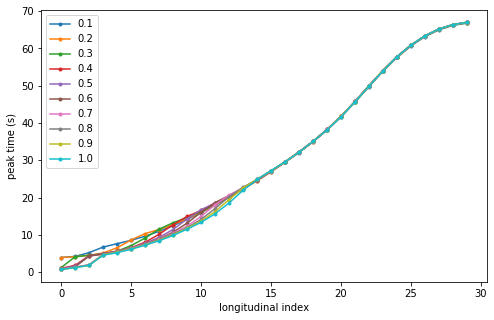

In [59]:
# Plot the peak arrival time

plt.figure(figsize=(8,5))
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    pk_times = []
    for i in range(numy // 2):
        pk_times.append(np.argmax(ca_lon_half[:, i]) * dt * save_interval)
    plt.plot(pk_times, '.-', label=str(round(active_v_beta_list[index],2)))

plt.xlabel('longitudinal index')
plt.ylabel('peak time (s)')
plt.legend()
plt.savefig('../../results/figures/sweep_stim_strength_slow/peak_times.png', bbox_inches='tight')
plt.show()

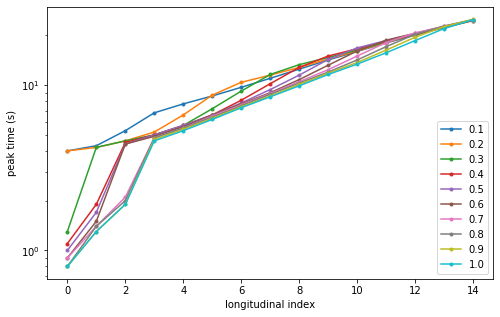

In [60]:
# Plot the log peak arrival time 

plt.figure(figsize=(8,5))
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    pk_times = []
    for i in range(numy // 2):
        pk_times.append(np.argmax(ca_lon_half[:, i]) * dt * save_interval)
    plt.plot(pk_times[:15], '.-', label=str(round(active_v_beta_list[index],2)))

plt.yscale('log')
plt.xlabel('longitudinal index')
plt.ylabel('peak time (s)')
plt.legend()
plt.savefig('../../results/figures/sweep_stim_strength_slow/log_peak_times.png', bbox_inches='tight')
plt.show()

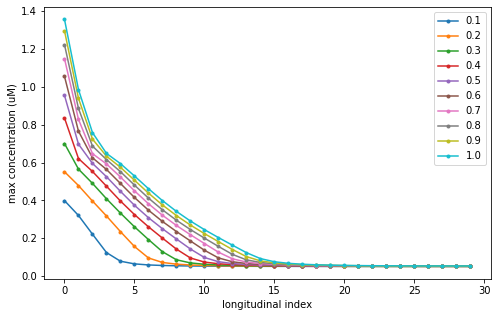

In [68]:
# Plot the amplitude

plt.figure(figsize=(8,5))
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    amps = []
    for i in range(numy // 2):
        amps.append(np.max(ca_lon_half[:, i]))
    plt.plot(amps, '.-', label=str(round(active_v_beta_list[index],2)))

plt.xlabel('longitudinal index')
plt.ylabel('max concentration (uM)')
plt.legend()
plt.savefig('../../results/figures/sweep_stim_strength_slow/amp.pdf', bbox_inches='tight')
plt.show()

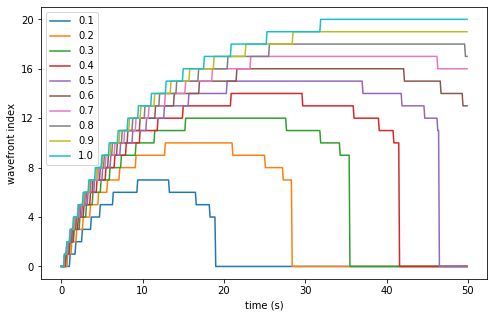

In [62]:
# Plot the wavefront index evolution

threshold = 0.055

plt.figure(figsize=(8,5))
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    wavefronts = []
    for t in np.arange(0, 50, 0.1):
        concentrs = ca_lon_half[int(t / 0.1)]
        for i in range(numy // 2 - 1, -1, -1):
            if concentrs[i] > threshold:
                break
        wavefronts.append(i) 
    plt.plot(np.arange(0, 50, 0.1), wavefronts, label=str(round(active_v_beta_list[index],2)))

plt.yticks(range(0, 21, 4))
plt.xlabel('time (s)')
plt.ylabel('wavefront index')
plt.legend()
plt.savefig('../../results/figures/sweep_stim_strength_slow/wavefront.png', bbox_inches='tight')
plt.show()

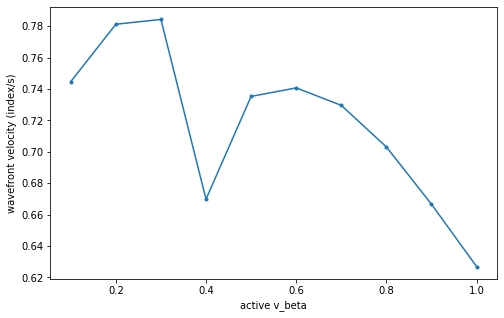

In [63]:
# Plot speed

threshold = 0.055

plt.figure(figsize=(8,5))

speeds = []

for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    wavefronts = []
    for t in np.arange(0, 50, 0.1):
        concentrs = ca_lon_half[int(t / 0.1)]
        for i in range(numy // 2 - 1, -1, -1):
            if concentrs[i] > threshold:
                break
        wavefronts.append(i) 
    speed = max(wavefronts) / ( np.argmax(wavefronts) * 0.1 )
    speeds.append(speed)

plt.plot(active_v_beta_list, speeds, '.-')
plt.xlabel('active v_beta')
plt.ylabel('wavefront velocity (index/s)')
plt.savefig('../../results/figures/sweep_stim_strength_slow/wavefront_velocity.png', bbox_inches='tight')
plt.show()